In [29]:
import numpy as np
import ot

def wasserstein_distances(original_data, generated_data):
    assert original_data.shape == generated_data.shape, "Both datasets must have the same dimensions."

    n_series = original_data.shape[0]
    wasserstein_distances = np.zeros(n_series)

    for i in range(n_series):
        hist_original, bin_edges_original = np.histogram(original_data[i], bins='auto', density=True)
        hist_generated, bin_edges_generated = np.histogram(generated_data[i], bins='auto', density=True)

        # Ensure both histograms and bin edges have the same number of bins
        n_bins = max(len(hist_original), len(hist_generated))
        hist_original = np.resize(hist_original, n_bins)
        hist_generated = np.resize(hist_generated, n_bins)
        bin_edges_original = np.resize(bin_edges_original, n_bins + 1)
        bin_edges_generated = np.resize(bin_edges_generated, n_bins + 1)

        # Normalize the histograms after resizing
        hist_original = hist_original / hist_original.sum()
        hist_generated = hist_generated / hist_generated.sum()

        # Calculate the cost matrix using the bin edges
        cost_matrix = ot.dist(bin_edges_original[:-1].reshape(-1, 1), bin_edges_generated[:-1].reshape(-1, 1))

        # Compute the Wasserstein distance using the Earth Mover's Distance (EMD)
        wasserstein_distance = ot.emd2(hist_original, hist_generated, cost_matrix)

        wasserstein_distances[i] = wasserstein_distance

    return wasserstein_distances


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram_matrix(original_data, generated_data):
    n_series = original_data.shape[0]
    n_bins = 50

    fig, axes = plt.subplots(n_series, 2, figsize=(10, n_series * 2))
    for i in range(n_series):
        axes[i, 0].hist(original_data[i], bins=n_bins, density=True, alpha=0.75, color='blue', label='Original')
        axes[i, 1].hist(generated_data[i], bins=n_bins, density=True, alpha=0.75, color='green', label='Generated')

        axes[i, 0].set_title(f'Original Series {i + 1}')
        axes[i, 1].set_title(f'Generated Series {i + 1}')

        axes[i, 0].legend()
        axes[i, 1].legend()

    plt.tight_layout()
    plt.show()


[0.00407967 0.02281369 1.3268857  0.00164713 0.00854321]


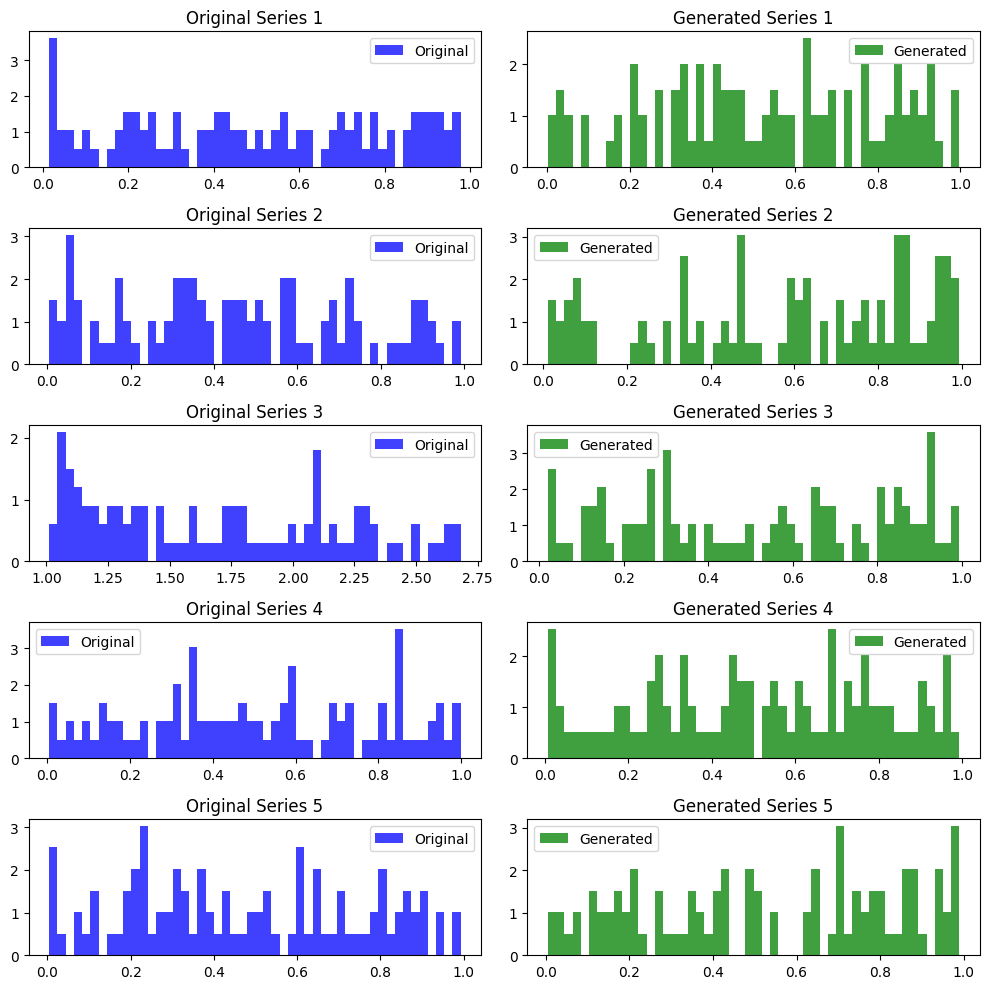

In [31]:
# Generate synthetic original and generated multivariate time series datasets
n_series = 5
n_timesteps = 100
original_data = np.random.rand(n_series, n_timesteps)
generated_data = np.random.rand(n_series, n_timesteps)

original_data[2] =np.exp(original_data[2])
# Calculate the Wasserstein distances for each corresponding time series
wasserstein_distances = wasserstein_distances(original_data, generated_data)
print(wasserstein_distances)
plot_histogram_matrix(original_data, generated_data)
